In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing, csv file I/O(e.g pd.read_csv)


In [ ]:
df=pd.read_csv('Churn_Modelling (1).csv')


In [ ]:

df.shape # total 10 thousand data points and 14 columns

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()#below are dropped 3 columns

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull()#any null value is their or not
#no null values below

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
#check any duplicate row is their or not
df.duplicated().sum()

0

In [ ]:
#check how many customers have left the bank
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
#check how many customers are from which geography
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
#check how many males and how many females are there
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
#we want to convert geography and gender  which is an object type convert it into integer
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
#assign all features to x and target column as y
#divide the data into train and test
X=df.drop(columns=['Exited'])
y=df['Exited'].values
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
#let us make uniform scaling of all features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
input links are 3 and 11 features are applied, total
let us compile the model , loss we will take binary cross entrophy and for #gradient descent adam optimer is used

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy')

In [ ]:
#let us train the model
history=model.fit(X_train_trf,y_train,epochs=10)



Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.4955
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4691
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4547
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4454
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4391
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4349
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4320
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4299
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4283
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4272


In [ ]:
now let us check final weights after training

In [ ]:
model.layers[0].get_weights()

[array([[ 0.6031718 ,  0.02144966, -0.05959441],
        [-0.28498495, -1.67237   , -1.8369626 ],
        [-0.20747685,  0.25347275,  0.07554573],
        [ 0.03759645, -0.21248329, -0.43524718],
        [ 0.515413  , -0.03983402,  0.08007938],
        [ 0.50436795, -0.18739177,  0.02157795],
        [ 0.620622  ,  0.76994807,  0.4275333 ],
        [-0.04402113, -0.2947103 ,  0.14858517],
        [-0.20279357, -0.8462114 , -0.39735633],
        [ 0.1148304 ,  0.09790786, -0.15723512],
        [ 0.21170343,  0.41944507,  0.54467756]], dtype=float32),
 array([0.07166614, 0.24990569, 0.07923704], dtype=float32)]

In [ ]:
model.layers[1].get_weights()

[array([[-0.5294227],
        [-1.223101 ],
        [-1.4963907]], dtype=float32),
 array([0.11619128], dtype=float32)]

In [ ]:
#three weights and 1 bias

In [ ]:
y_log=model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_log # result is in the form of probability


array([[0.2439231 ],
       [0.3486603 ],
       [0.1761208 ],
       ...,
       [0.16431569],
       [0.1240285 ],
       [0.18600729]], dtype=float32)

In [ ]:
##ur expected result is 0,1
#and predicted result is in the form of probabiltity need to convert it since u r using sigmoid activation
#if the output is less than 0.5 then output is 0 means customer will leave the bank
# and if the output is greater than 0.5 then 1 means customer will retain the bank

In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
#check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.806

In [ ]:
#let us increase the number of nodes and layers also
model=Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#11*11+11 bias, 11*11+11 bias, 11*1+1 bias=276

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5872 - accuracy: 0.7014 - val_loss: 0.4985 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7958 - val_loss: 0.4773 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7958 - val_loss: 0.4597 - val_accuracy: 0.7969
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7958 - val_loss: 0.4460 - val_accuracy: 0.7969
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.7970 - val_loss: 0.4385 - val_accuracy: 0.8006
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8042 - val_loss: 0.4347 - val_accuracy: 0.8075
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8087 - val_loss: 0.4333 - val_accuracy: 0.8087

In [ ]:
y_log=model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
#now accuracy has been improved compared to earlier

0.8615

In [ ]:
history.history

{'loss': [0.5871955752372742,
  0.4865645468235016,
  0.46707892417907715,
  0.4499948024749756,
  0.4378725290298462,
  0.43103083968162537,
  0.42788752913475037,
  0.4263605773448944,
  0.42550575733184814,
  0.42476147413253784,
  0.42380473017692566,
  0.4228935241699219,
  0.4216700792312622,
  0.4206903874874115,
  0.4196150302886963,
  0.41838347911834717,
  0.417031466960907,
  0.4159156084060669,
  0.4143799841403961,
  0.41303199529647827,
  0.41167598962783813,
  0.41011714935302734,
  0.40850594639778137,
  0.4067009389400482,
  0.4049365520477295,
  0.402884840965271,
  0.40111151337623596,
  0.39944377541542053,
  0.39726388454437256,
  0.3954000771045685,
  0.39328643679618835,
  0.3915919363498688,
  0.38997790217399597,
  0.3878432810306549,
  0.3858557641506195,
  0.38383784890174866,
  0.382129967212677,
  0.38007792830467224,
  0.37855106592178345,
  0.37655940651893616,
  0.3745936155319214,
  0.3729729950428009,
  0.3715362548828125,
  0.36948394775390625,
  0.36

In [ ]:
in above output you will find accuracy_loss, validation loss, validation_accuracy

In [ ]:
#total 100 from this 80 percent training and 20 perc testing
#and from 80 percent = 60 percent for training and 20 for validation

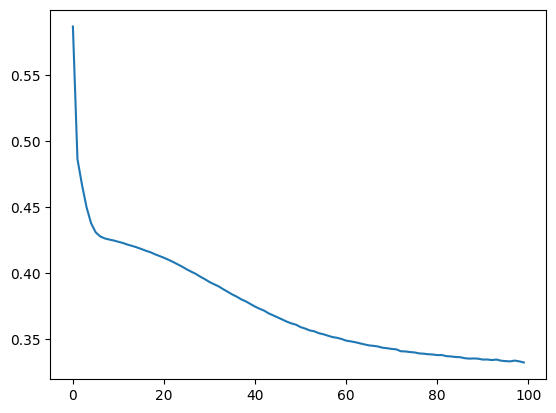

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

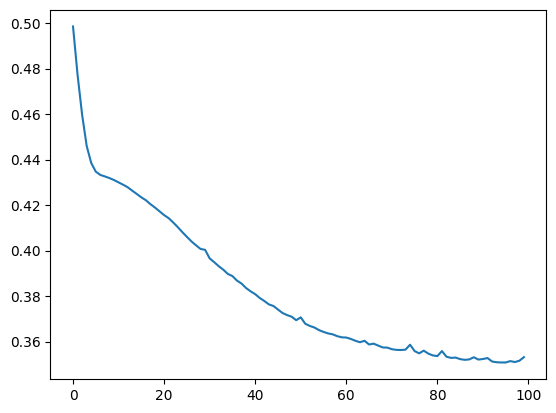

In [ ]:
plt.plot(history.history['val_loss'])

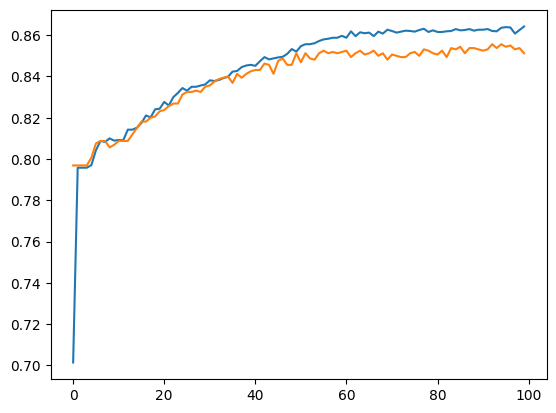

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])